In [5]:
import pandas as pd
PATH = '../../data/' 
df = pd.read_csv(PATH + 'train.csv')

In [6]:
df.head(2)

uid    city                                        description  \
0   1748  austin  MULTIPLE OFFERS submit best & final to Agent b...   
1  13380  austin  4644 Hoffman Dr, Austin, TX 78749 is a single ...   

        homeType   latitude  longitude  garageSpaces  hasSpa  yearBuilt  \
0  Single Family  30.380089 -97.800621             0   False       1988   
1  Single Family  30.199486 -97.859947             0   False       1997   

   numOfPatioAndPorchFeatures  lotSizeSqFt  avgSchoolRating  \
0                           0     102366.0         7.000000   
1                           0       6534.0         6.666667   

   MedianStudentsPerTeacher  numOfBathrooms  numOfBedrooms     priceRange  
0                        17             4.0              4        650000+  
1                        16             3.0              4  350000-450000

# Exploratory Data Analisys (EDA)

In [7]:
df['priceRange'].value_counts(normalize = True)

priceRange
250000-350000    0.2356
350000-450000    0.2301
450000-650000    0.2275
650000+          0.1819
0-250000         0.1249
Name: proportion, dtype: float64

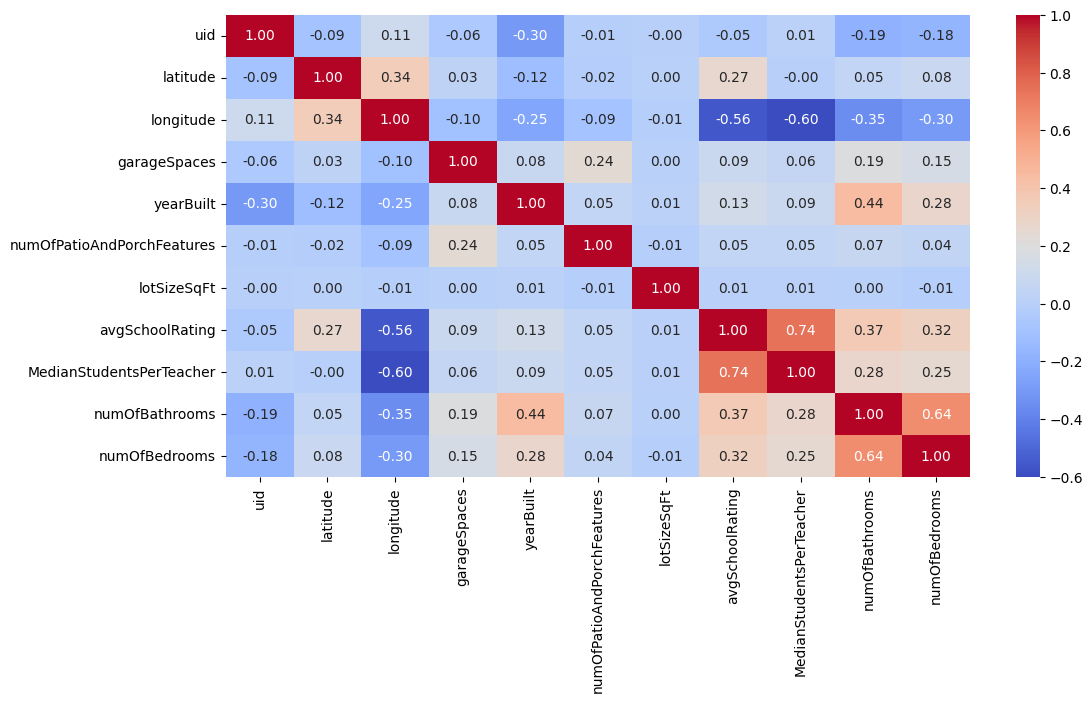

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt 
df_numeric = df.select_dtypes(include = ['number'])
plt.figure(figsize = (12,6))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.show()


<li> Highly correlation between bathrooms and bedrooms </li>
<li> Year built with correlation with bathrooms </li>
<li> Corr between studentsperteacher and avgschoolrating </li>

## Identify Distributions

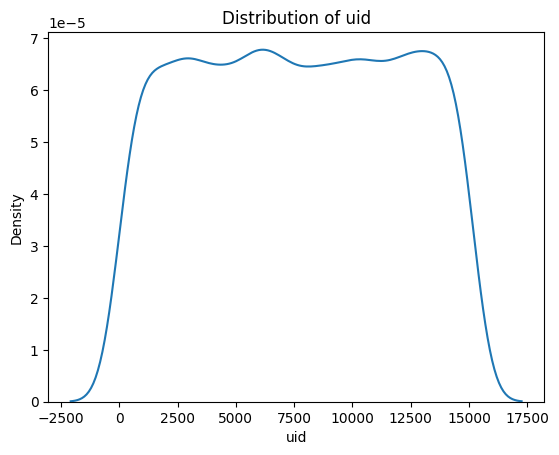

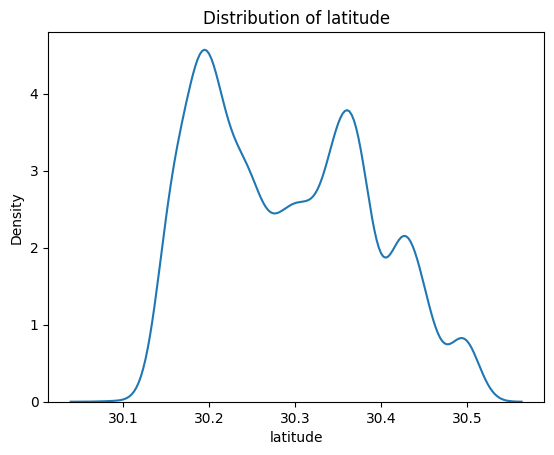

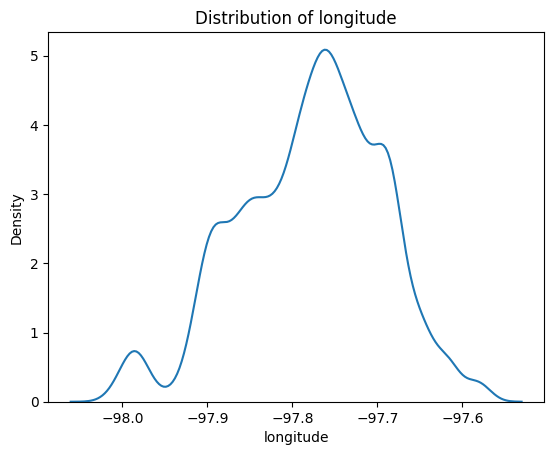

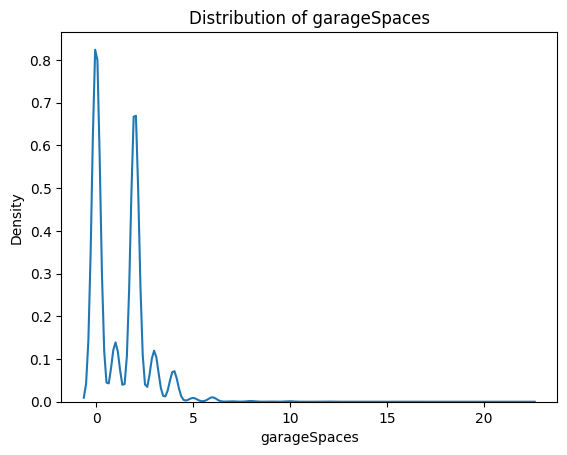

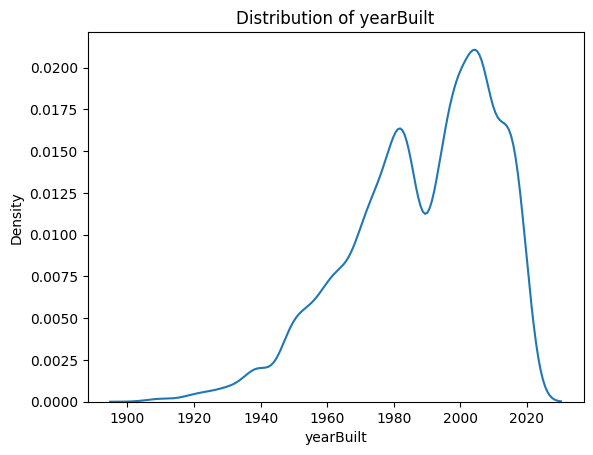

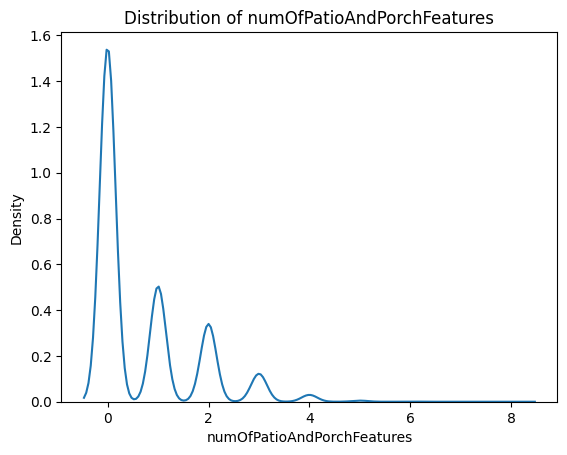

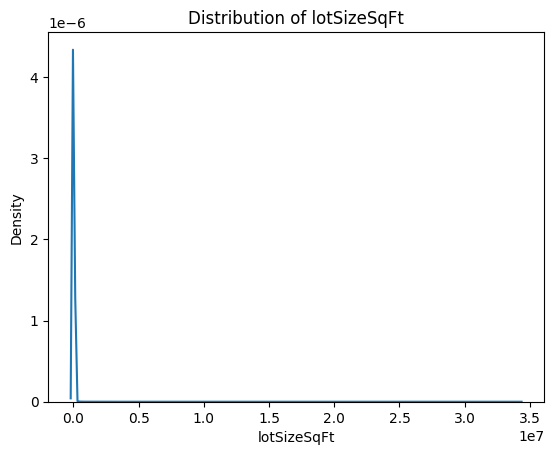

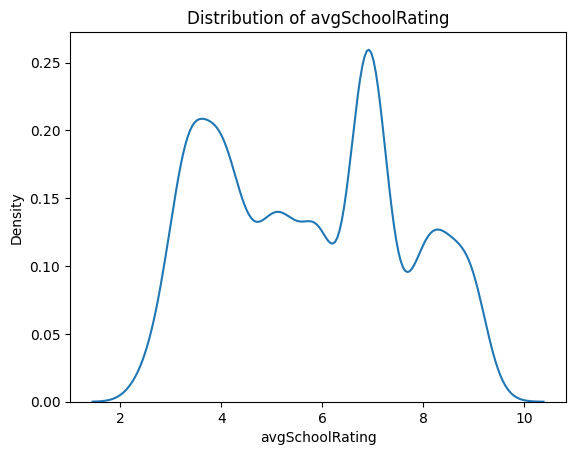

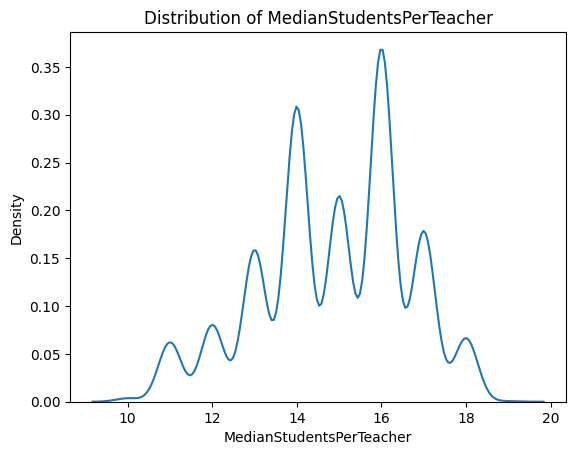

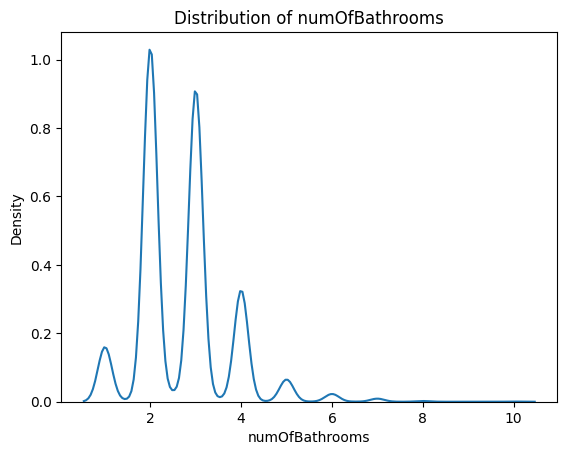

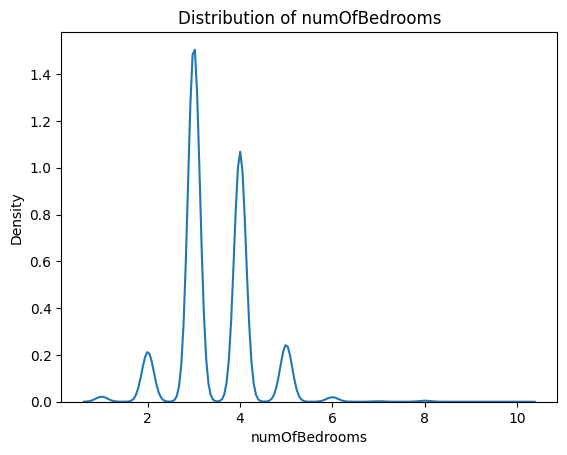

In [9]:
def identify_distribuitions(dataset: pd.DataFrame, feature_list:list):
    for feature in feature_list: 
        sns.kdeplot(x = feature, data = dataset)
        plt.title(f'Distribution of {feature}')
        plt.show()

identify_distribuitions(df, df_numeric.columns)

# Data Pre-Processing

In [13]:
df['hasSpa'] = df['hasSpa'].apply(lambda x: 1 if x == True else 0 )

In [12]:
def aggregate_year_built(df) -> pd.DataFrame:
    bins = [1900, 1920, 1940, 1960, 1980, 2000, 2010, 2021]
    labels = ['1900-1920','1920-1940','1940-1960', '1960-1980','1980-2000','2000-2010','2010-2021']
    df['yearBuilt_Labels'] = pd.cut(df['yearBuilt'], bins = bins, labels = labels, include_lowest = True)
    return df

In [14]:
def aggregate_home_type(home_type):
    result = ''
    if home_type in ['Single Family','Townhouse','Mobile / Manufactured']:
        result = 'Single Residential'
    elif home_type in ['Multiple Occupancy','Condo','Apartment','MultiFamily']:
        result = 'Multi Residential'
    else:
        result = 'Other/Non-Residential'
    return result


In [15]:
df['homeType_Labels'] = df['homeType'].apply(aggregate_home_type)
df = aggregate_year_built(df)

In [16]:
df_year_built = pd.get_dummies(df['yearBuilt_Labels'], prefix = 'year').replace({True:1, False:0})
df_home_types = pd.get_dummies(df['homeType_Labels'], prefix = 'home_type').replace({True:1, False:0})


/var/folders/4l/xlq2hqg90jl3mj85fjgjkxg40000gr/T/ipykernel_21233/3499543718.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_year_built = pd.get_dummies(df['yearBuilt_Labels'], prefix = 'year').replace({True:1, False:0})
/var/folders/4l/xlq2hqg90jl3mj85fjgjkxg40000gr/T/ipykernel_21233/3499543718.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_home_types = pd.get_dummies(df['homeType_Labels'], prefix = 'home_type').replace({True:1, False:0})


In [10]:
df_year_built

NameError: name 'df_year_built' is not defined

In [17]:
df_concat = pd.concat([df,df_year_built,df_home_types],axis=1)

In [18]:
df_concat

uid    city                                        description  \
0      1748  austin  MULTIPLE OFFERS submit best & final to Agent b...   
1     13380  austin  4644 Hoffman Dr, Austin, TX 78749 is a single ...   
2      4115  austin  6804 Canal St, Austin, TX 78741 is a single fa...   
3      6926  austin  Beautiful large lot with established trees. Lo...   
4     14480  austin  Stunning NW Hills designer remodel by Cedar an...   
...     ...     ...                                                ...   
9995   8614  austin  Updated Great Hills Opportunity! Large corner ...   
9996  10505  austin  Adorable 3/2 in the heart of South Austin! Sit...   
9997   6942  austin  7322 Gaines Mill Ln, Austin, TX 78745 is a sin...   
9998   1845  austin  5213 Doe Valley Ln, Austin, TX 78759 is a sing...   
9999   4425  austin  Beautiful single-story home with open floor pl...   

           homeType   latitude  longitude  garageSpaces  hasSpa  yearBuilt  \
0     Single Family  30.380089 -97.800621             0       0       1988   
1     Single Family  30.199486 -97.859947             0       0       1997   
2     Single Family  30.227398 -97.696083             0       0       1952   
3     Single Family  30.205469 -97.792351             4       0       1976   
4     Single Family  30.345106 -97.767426             2       0       1984   
...             ...        ...        ...           ...     ...        ...   
9995  Single Family  30.409927 -97.763390             2       0       1982   
9996  Single Family  30.206074 -97.779472             0       0       1970   
9997  Single Family  30.198936 -97.810913             0       0       1981   
9998  Single Family  30.391880 -97.761292             0       0       1979   
9999  Single Family  30.346609 -97.614983             1       0       2013   

      numOfPatioAndPorchFeatures  ...  year_1900-1920  year_1920-1940  \
0                              0  ...               0               0   
1                              0  ...               0               0   
2                              0  ...               0               0   
3                              0  ...               0               0   
4                              0  ...               0               0   
...                          ...  ...             ...             ...   
9995                           3  ...               0               0   
9996                           0  ...               0               0   
9997                           1  ...               0               0   
9998                           2  ...               0               0   
9999                           0  ...               0               0   

      year_1940-1960  year_1960-1980  year_1980-2000 year_2000-2010  \
0                  0               0               1              0   
1                  0               0               1              0   
2                  1               0               0              0   
3                  0               1               0              0   
4                  0               0               1              0   
...              ...             ...             ...            ...   
9995               0               0               1              0   
9996               0               1               0              0   
9997               0               0               1              0   
9998               0               1               0              0   
9999               0               0               0              0   

     year_2010-2021 home_type_Multi Residential  \
0                 0                           0   
1                 0                           0   
2                 0                           0   
3                 0                           0   
4                 0                           0   
...             ...                         ...   
9995              0                           0   
9996              0                         

# Built Model

In [19]:
df_concat.columns

Index(['uid', 'city', 'description', 'homeType', 'latitude', 'longitude',
       'garageSpaces', 'hasSpa', 'yearBuilt', 'numOfPatioAndPorchFeatures',
       'lotSizeSqFt', 'avgSchoolRating', 'MedianStudentsPerTeacher',
       'numOfBathrooms', 'numOfBedrooms', 'priceRange', 'homeType_Labels',
       'yearBuilt_Labels', 'year_1900-1920', 'year_1920-1940',
       'year_1940-1960', 'year_1960-1980', 'year_1980-2000', 'year_2000-2010',
       'year_2010-2021', 'home_type_Multi Residential',
       'home_type_Other/Non-Residential', 'home_type_Single Residential'],
      dtype='object')

In [20]:
SELECT_COLUMNS = [ 'latitude', 'longitude', 'garageSpaces', 'hasSpa','numOfPatioAndPorchFeatures',
       'lotSizeSqFt', 'avgSchoolRating', 'MedianStudentsPerTeacher',
       'numOfBathrooms', 'numOfBedrooms','priceRange', 'year_1900-1920', 'year_1920-1940',
       'year_1940-1960', 'year_1960-1980', 'year_1980-2000', 'year_2000-2010',
       'year_2010-2021', 'home_type_Multi Residential',
       'home_type_Other/Non-Residential', 'home_type_Single Residential']
df_filtered = df_concat[SELECT_COLUMNS]

In [23]:

X = df_filtered.drop(['priceRange'],axis = 1)
y = df_filtered['priceRange'].values

In [24]:
from sklearn.model_selection import train_test_split

In [31]:
X_test.sample(2)

latitude  longitude  garageSpaces  hasSpa  numOfPatioAndPorchFeatures  \
4649  30.263742 -97.729301             1       0                           2   
4313  30.501310 -97.778183             0       0                           0   

      lotSizeSqFt  avgSchoolRating  MedianStudentsPerTeacher  numOfBathrooms  \
4649       1424.0         4.666667                        14             2.0   
4313       5880.0         8.333333                        16             2.0   

      numOfBedrooms  year_1900-1920  year_1920-1940  year_1940-1960  \
4649              2               0               0               0   
4313              3               0               0               0   

      year_1960-1980  year_1980-2000  year_2000-2010  year_2010-2021  \
4649               0               0               1               0   
4313               0               0               1               0   

      home_type_Multi Residential  home_type_Other/Non-Residential  \
4649                            1                                0   
4313                            0                                0   

      home_type_Single Residential  
4649                             0  
4313                             1

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.25)
X_train.columns

Index(['latitude', 'longitude', 'garageSpaces', 'hasSpa',
       'numOfPatioAndPorchFeatures', 'lotSizeSqFt', 'avgSchoolRating',
       'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms',
       'year_1900-1920', 'year_1920-1940', 'year_1940-1960', 'year_1960-1980',
       'year_1980-2000', 'year_2000-2010', 'year_2010-2021',
       'home_type_Multi Residential', 'home_type_Other/Non-Residential',
       'home_type_Single Residential'],
      dtype='object')

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, classification_report
)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.25)
rfc = RandomForestClassifier(n_estimators= 500)
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500)

In [70]:
def classification_metrics(y_true, y_pred, y_prob=None, average='weighted'):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average=average, zero_division=0),
        'Recall': recall_score(y_true, y_pred, average=average, zero_division=0),
        'F1-score': f1_score(y_true, y_pred, average=average, zero_division=0),
        'Confusion Matrix': confusion_matrix(y_true, y_pred).tolist(),
        'Classification Report': classification_report(y_true, y_pred, zero_division=0)
    }
    
    # AUC-ROC only if probabilities are provided and it is a binary classification
    return metrics

In [71]:
y_pred = rfc.predict(X_test)
metrics = classification_metrics(y_test, y_pred, y_prob=None, average='weighted')

In [72]:
metrics

{'Accuracy': 0.6128,
 'Precision': 0.6167246393568552,
 'Recall': 0.6128,
 'F1-score': 0.6120497062829936,
 'Confusion Matrix': [[163, 115, 41, 8, 1],
  [60, 361, 130, 28, 8],
  [6, 137, 307, 123, 11],
  [2, 17, 107, 353, 84],
  [0, 2, 4, 84, 348]],
 'Classification Report': '               precision    recall  f1-score   support\n\n     0-250000       0.71      0.50      0.58       328\n250000-350000       0.57      0.61      0.59       587\n350000-450000       0.52      0.53      0.52       584\n450000-650000       0.59      0.63      0.61       563\n      650000+       0.77      0.79      0.78       438\n\n     accuracy                           0.61      2500\n    macro avg       0.63      0.61      0.62      2500\n weighted avg       0.62      0.61      0.61      2500\n'}

In [75]:
# Cross-validation setup
import numpy as  np
from sklearn.model_selection import train_test_split, StratifiedKFold

n_classes = len(np.unique(y))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy, cv_precision, cv_recall, cv_f1, cv_roc_auc = [], [], [], [], []

# Perform cross-validation
for train_idx, val_idx in cv.split(X_train, y_train):
    X_fold_train, y_fold_train = X_train.iloc[train_idx], y_train[train_idx]
    X_fold_val, y_fold_val = X_train.iloc[val_idx], y_train[val_idx]
    
    # Train a new model for each fold
    fold_model = RandomForestClassifier(n_estimators=500, random_state=42)
    fold_model.fit(X_fold_train, y_fold_train)
    
    # Predictions and probabilities
    y_pred = fold_model.predict(X_fold_val)
    y_proba = fold_model.predict_proba(X_fold_val)
    
    # Calculate metrics
    cv_accuracy.append(accuracy_score(y_fold_val, y_pred))
    cv_precision.append(precision_score(y_fold_val, y_pred, average='macro'))
    cv_recall.append(recall_score(y_fold_val, y_pred, average='macro'))
    cv_f1.append(f1_score(y_fold_val, y_pred, average='macro'))
    
    # ROC AUC handling for binary/multiclass
    if n_classes == 2:
        cv_roc_auc.append(roc_auc_score(y_fold_val, y_proba[:, 1]))
    else:
        cv_roc_auc.append(roc_auc_score(y_fold_val, y_proba, multi_class='ovr', average='macro'))

# Cross-validation results
print("Cross-Validation Metrics:")
print(f"Accuracy: {np.mean(cv_accuracy):.4f} (±{np.std(cv_accuracy):.4f})")
print(f"Precision (Macro): {np.mean(cv_precision):.4f} (±{np.std(cv_precision):.4f})")
print(f"Recall (Macro): {np.mean(cv_recall):.4f} (±{np.std(cv_recall):.4f})")
print(f"F1 Score (Macro): {np.mean(cv_f1):.4f} (±{np.std(cv_f1):.4f})")
print(f"ROC AUC: {np.mean(cv_roc_auc):.4f} (±{np.std(cv_roc_auc):.4f})\n")

# Train final model on entire training data
rfc.fit(X_train, y_train)

# Test set evaluation
y_pred_test = rfc.predict(X_test)
y_proba_test = rfc.predict_proba(X_test)

# Calculate test metrics
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='macro')
test_recall = recall_score(y_test, y_pred_test, average='macro')
test_f1 = f1_score(y_test, y_pred_test, average='macro')

if n_classes == 2:
    test_roc_auc = roc_auc_score(y_test, y_proba_test[:, 1])
else:
    test_roc_auc = roc_auc_score(y_test, y_proba_test, multi_class='ovr', average='macro')

print("Test Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision (Macro): {test_precision:.4f}")
print(f"Recall (Macro): {test_recall:.4f}")
print(f"F1 Score (Macro): {test_f1:.4f}")
print(f"ROC AUC: {test_roc_auc:.4f}\n")

# Additional diagnostics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

Cross-Validation Metrics:
Accuracy: 0.6089 (±0.0075)
Precision (Macro): 0.6272 (±0.0037)
Recall (Macro): 0.6039 (±0.0063)
F1 Score (Macro): 0.6115 (±0.0051)
ROC AUC: 0.8712 (±0.0037)

Test Set Metrics:
Accuracy: 0.6108
Precision (Macro): 0.6304
Recall (Macro): 0.6101
F1 Score (Macro): 0.6165
ROC AUC: 0.8780

Confusion Matrix:
[[166 112  41   8   1]
 [ 59 361 128  31   8]
 [  7 132 317 115  13]
 [  0  20 112 341  90]
 [  1   1   4  90 342]]

Classification Report:
               precision    recall  f1-score   support

     0-250000       0.71      0.51      0.59       328
250000-350000       0.58      0.61      0.60       587
350000-450000       0.53      0.54      0.53       584
450000-650000       0.58      0.61      0.59       563
      650000+       0.75      0.78      0.77       438

     accuracy                           0.61      2500
    macro avg       0.63      0.61      0.62      2500
 weighted avg       0.62      0.61      0.61      2500



In [76]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 300, 50),  # Number of trees
    'max_depth': [None, 10, 20, 30, 40],     # Tree depth
    'min_samples_split': [2, 5, 10],         # Min samples to split a node
    'min_samples_leaf': [1, 2, 5],           # Min samples per leaf
    'max_features': ['sqrt', 'log2', None],  # Number of features per split
    'bootstrap': [True, False],              # Whether to use bootstrap sampling
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist, 
    n_iter=20,  # Number of random combinations to try
    scoring='accuracy', 
    cv=5,  # 5-fold cross-validation
    verbose=2, 
    random_state=42, 
    n_jobs=-1  # Use all available cores
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   4.6s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   4.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   5.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   5.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   5.0s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 50, 100, 150, 200, 250])},
                   random_state=42, scoring='accuracy', verbose=2)

In [4]:
y_pred

NameError: name 'y_pred' is not defined

In [77]:
print("Best Hyperparameters:", random_search.best_params_)

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'n_estimators': np.int64(100), 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}
Test Accuracy: 0.62
               precision    recall  f1-score   support

     0-250000       0.77      0.48      0.59       328
250000-350000       0.57      0.64      0.60       587
350000-450000       0.51      0.53      0.52       584
450000-650000       0.61      0.65      0.63       563
      650000+       0.78      0.79      0.78       438

     accuracy                           0.62      2500
    macro avg       0.65      0.62      0.63      2500
 weighted avg       0.63      0.62      0.62      2500



In [78]:
classification_metrics(y_test, y_pred, y_prob=None, average='weighted')

{'Accuracy': 0.62,
 'Precision': 0.6298036834315892,
 'Recall': 0.62,
 'F1-score': 0.6198060654757447,
 'Confusion Matrix': [[157, 122, 41, 6, 2],
  [44, 373, 139, 23, 8],
  [1, 140, 312, 119, 12],
  [1, 13, 110, 364, 75],
  [0, 1, 6, 87, 344]],
 'Classification Report': '               precision    recall  f1-score   support\n\n     0-250000       0.77      0.48      0.59       328\n250000-350000       0.57      0.64      0.60       587\n350000-450000       0.51      0.53      0.52       584\n450000-650000       0.61      0.65      0.63       563\n      650000+       0.78      0.79      0.78       438\n\n     accuracy                           0.62      2500\n    macro avg       0.65      0.62      0.63      2500\n weighted avg       0.63      0.62      0.62      2500\n'}

In [79]:
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [80]:
import lightgbm as lgb
param_dist = {
    'num_leaves': np.arange(10, 200, 10),
    'learning_rate': np.logspace(-3, 0, 10),  # Log scale from 0.001 to 1
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': [-1, 5, 10, 20, 30],  # -1 means no limit
    'min_child_samples': np.arange(5, 50, 5),
    'subsample': np.linspace(0.5, 1, 5),
    'colsample_bytree': np.linspace(0.5, 1, 5),
    'reg_alpha': np.logspace(-3, 1, 10),  # L1 regularization
    'reg_lambda': np.logspace(-3, 1, 10), # L2 regularization
}

lgb_model = lgb.LGBMClassifier(objective='multiclass', num_class=len(np.unique(y)), random_state=42)

random_search = RandomizedSearchCV(
    lgb_model,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 860
[LightGBM] [Info] Number of data points

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(num_class=5, objective='multiclass',
                                            random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5  , 0.625, 0.75 , 0.875, 1.   ]),
                                        'learning_rate': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ]),
                                        'max_depth': [-1, 5, 10, 20, 30],
                                        'min_child_samples'...
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01]),
                                        'reg_lambda': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01]),
                                        'subsample': array([0.5  , 0.625, 0.75 , 0.875, 1.   ])},
                   random_state=42, scoring='accuracy', verbose=2)

In [84]:
best_lgb = random_search.best_estimator_
y_pred = best_lgb.predict(X_test)

metrics = classification_metrics(y_test, y_pred, y_prob=None, average='weighted')

In [89]:
# Save the model to a pickle file
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_lgb, file)

In [2]:
X_test

NameError: name 'X_test' is not defined

In [88]:
print(metrics['Classification Report'])

               precision    recall  f1-score   support

     0-250000       0.71      0.53      0.60       328
250000-350000       0.58      0.61      0.59       587
350000-450000       0.51      0.52      0.52       584
450000-650000       0.60      0.65      0.63       563
      650000+       0.80      0.80      0.80       438

     accuracy                           0.62      2500
    macro avg       0.64      0.62      0.63      2500
 weighted avg       0.62      0.62      0.62      2500

